In [ ]:
!pip install citipy

In [ ]:
from citipy import citipy

In [ ]:
# Import the random module.
import random

In [ ]:
# Import the NumPy module.
import numpy as np

In [ ]:
# Import timeit.
import timeit

In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

In [ ]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500. 
%timeit latitudes(1500)

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
import requests
requests.__version__

In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Initialize an Empty List and Counters

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

In [ ]:
# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Loop Through the List of Cities and Build the City URL

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [31]:
len(city_data)

604

# Convert the array of dictionaries to a Pandas DataFrame.

In [32]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hami,42.80,93.45,80.53,16,0,8.16,CN,2020-06-16 19:31:00
1,Touros,-5.20,-35.46,77.00,94,40,4.70,BR,2020-06-16 19:26:40
2,Batemans Bay,-35.72,150.18,42.01,100,3,6.11,AU,2020-06-16 19:31:37
3,Barrow,71.29,-156.79,39.20,80,1,14.99,US,2020-06-16 19:30:43
4,Sao Filipe,14.90,-24.50,78.35,75,0,8.99,CV,2020-06-16 19:26:33
5,Sorland,67.67,12.69,53.60,62,5,12.75,NO,2020-06-16 19:30:37
6,Kaeo,-35.10,173.78,54.00,3,16,5.70,NZ,2020-06-16 19:35:04
7,Castro,-24.79,-50.01,68.29,69,60,4.94,BR,2020-06-16 19:26:32
8,Kathu,7.92,98.33,77.00,100,20,1.12,TH,2020-06-16 19:35:04
9,Xinqing,48.23,129.50,49.69,93,100,7.92,CN,2020-06-16 19:35:04


In [30]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hami,CN,2020-06-16 19:31:00,42.80,93.45,80.53,16,0,8.16
1,Touros,BR,2020-06-16 19:26:40,-5.20,-35.46,77.00,94,40,4.70
2,Batemans Bay,AU,2020-06-16 19:31:37,-35.72,150.18,42.01,100,3,6.11
3,Barrow,US,2020-06-16 19:30:43,71.29,-156.79,39.20,80,1,14.99
4,Sao Filipe,CV,2020-06-16 19:26:33,14.90,-24.50,78.35,75,0,8.99
5,Sorland,NO,2020-06-16 19:30:37,67.67,12.69,53.60,62,5,12.75
6,Kaeo,NZ,2020-06-16 19:35:04,-35.10,173.78,54.00,3,16,5.70
7,Castro,BR,2020-06-16 19:26:32,-24.79,-50.01,68.29,69,60,4.94
8,Kathu,TH,2020-06-16 19:35:04,7.92,98.33,77.00,100,20,1.12
9,Xinqing,CN,2020-06-16 19:35:04,48.23,129.50,49.69,93,100,7.92


# Create the output file (CSV).

In [34]:
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592338194.668225

# Build the scatter plot for latitude vs. max temperature.

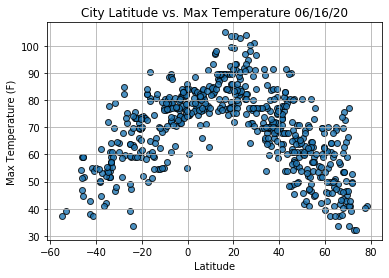

In [37]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# Build the scatter plots for latitude vs. humidity.

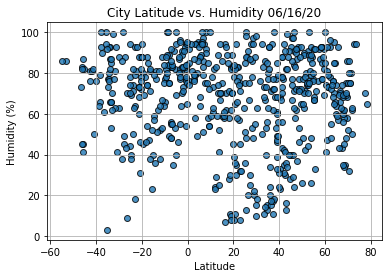

In [38]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. cloudiness.

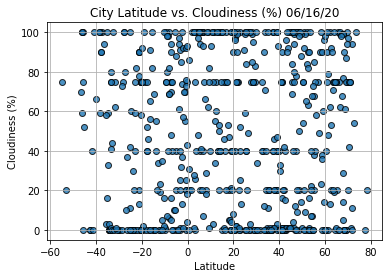

In [40]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Build the scatter plots for latitude vs. wind speed.

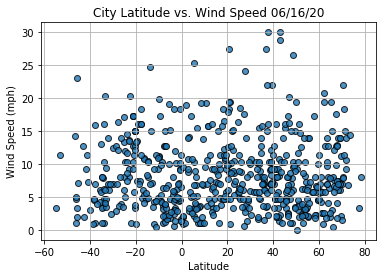

In [41]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()